## ECE657A - DKMA Winter 2019
#### Homework 2

The Wine Quality Data Set: http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/


In the wine quality dataset select the first 10 rows and perform the following computations and report them in a table:

- min-max normalized values, z-score normalized values, mean subtracted normalized values

- for each of the  first 10 data points report the nearest and farthest out of the other first 10 points  using  the  following  distance  metrics  (so  in  the  end  you  will  have  10  rows  and  two columns, nearest and fasthest):
    + manhatten distance
    + euclidean distance
    + cosine distance
    
- Plot all the datapoints along each pair of two dimensions using each type of normalization (additional)

#### Data Information: 
Number of Instances: red wine - 1599; white wine - 4898. 

Number of Attributes: 11 + output attribute

Attribute information:

   Input variables (based on physicochemical tests):
   
   1 - fixed acidity
   
   2 - volatile acidity
   
   3 - citric acid
   
   4 - residual sugar
   
   5 - chlorides
   
   6 - free sulfur dioxide
   
   7 - total sulfur dioxide
   
   8 - density
   
   9 - pH
   
   10 - sulphates
   
   11 - alcohol
   
   Output variable (based on sensory data): 
   
   12 - quality (score between 0 and 10)

In [110]:
## import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [111]:
## load the data in pandas
red_wine = pd.read_csv('winequality-red.csv',sep=";")
white_wine = pd.read_csv('winequality-white.csv',sep=";")

In [112]:
# examine the data shape
print("The shape of the red wine data: " , red_wine.shape)
print("The shape of the white wine data: " , white_wine.shape)

The shape of the red wine data:  (1599, 12)
The shape of the white wine data:  (4898, 12)


### Task 1: Normalize the data

In [113]:
# define function for min-max normalization
def normalize(data):
    """
    Input: data is a dataFrame
    Output: the min-max normalization result, dataFrame
    """
    interval = data.max() - data.min()
    MinMaxNormalize = (data - data.min())/interval
    return MinMaxNormalize

In [114]:
# min max normalization for the data sets
red_wine_mmn = normalize(red_wine)
white_wine_mmn = normalize(white_wine)

In [115]:
# define function for z-score normalization
def zscore(data):
    """
    Input: data is a dataFrame
    Output: the z-score normalization result, dataFrame
    """
    zscore = (data - data.mean())/data.std()
    return zscore

#zscore normalization for the data sets
red_wine_zs = zscore(red_wine)
white_wine_zs = zscore(white_wine)

In [116]:
#mean subtracted normalized values for the data sets:
red_wine_sm = (red_wine - red_wine.mean())
white_wine_sm = (white_wine - white_wine.mean())

### Task 2: Evaluate the distance
- for each of the  first 10 data points report the nearest and farthest out of the other first 10 points  using  the  following  distance  metrics  (so  in  the  end  you  will  have  10  rows  and  two columns, nearest and fasthest):
    + manhatten distance
    + euclidean distance
    + cosine distance

In [117]:
# take the first 10 points for each of the data
# In case of the distance comparison, we select
# the data set after min-max  normalization
first_ten_rw = red_wine_mmn[0:10]

In [118]:
first_ten_rw

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
5,0.247788,0.369863,0.00,0.061644,0.105175,0.169014,0.120141,0.567548,0.606299,0.137725,0.153846,0.4
6,0.292035,0.328767,0.06,0.047945,0.095159,0.197183,0.187279,0.464758,0.440945,0.077844,0.153846,0.4
7,0.238938,0.363014,0.00,0.020548,0.088481,0.197183,0.053004,0.332599,0.511811,0.083832,0.246154,0.8
8,0.283186,0.315068,0.02,0.075342,0.101836,0.112676,0.042403,0.494126,0.488189,0.143713,0.169231,0.8
9,0.256637,0.260274,0.36,0.356164,0.098497,0.225352,0.339223,0.567548,0.480315,0.281437,0.323077,0.4


In [119]:
import scipy.spatial.distance


## calculate the mahattan distance, euclidean distance and cosine distance 
## for each pair of the ten data points
mahattan_distance = scipy.spatial.distance.pdist(first_ten_rw, 'cityblock')
euclidean_distance = scipy.spatial.distance.pdist(first_ten_rw, 'euclidean')
cosine_distance = scipy.spatial.distance.pdist(first_ten_rw, 'cosine')

In [120]:
mahattan_distance

array([1.00806054, 0.66863019, 1.92579305, 0.        , 0.08528645,
       0.67767686, 1.0873164 , 0.8470581 , 1.56557166, 0.41943034,
       1.87507946, 1.00806054, 0.99460613, 0.8480349 , 1.5238047 ,
       1.34481492, 1.53905504, 1.64887817, 0.66863019, 0.65517579,
       0.49330882, 1.21374294, 0.99475315, 1.34485955, 1.92579305,
       1.85420523, 1.63458598, 2.11654805, 1.81536648, 1.7245969 ,
       0.08528645, 0.67767686, 1.0873164 , 0.8470581 , 1.56557166,
       0.59239041, 1.04443278, 0.87421114, 1.49398384, 1.01701504,
       0.88387216, 1.41054561, 0.59740338, 2.0814326 , 1.88786601])

In [121]:
euclidean_distance

array([0.38275612, 0.25112926, 0.80319496, 0.        , 0.04520291,
       0.25155365, 0.49469707, 0.43827359, 0.60109032, 0.18329176,
       0.80152358, 0.38275612, 0.37420188, 0.31037702, 0.55722117,
       0.55601812, 0.56713383, 0.7246836 , 0.25112926, 0.24830403,
       0.19036054, 0.49460359, 0.4595566 , 0.51135958, 0.80319496,
       0.78913905, 0.6779047 , 0.81222103, 0.73065841, 0.60522176,
       0.04520291, 0.25155365, 0.49469707, 0.43827359, 0.60109032,
       0.23308623, 0.49289728, 0.44009636, 0.58720523, 0.46632796,
       0.44549028, 0.54501353, 0.22636931, 0.77270949, 0.71208612])

In [122]:
cosine_distance

array([0.06288494, 0.02729395, 0.21805049, 0.        , 0.00087877,
       0.02210462, 0.09689933, 0.07199292, 0.13204737, 0.01340134,
       0.21672094, 0.06288494, 0.06030558, 0.03730255, 0.12312607,
       0.11805234, 0.11674181, 0.17408993, 0.02729395, 0.02696082,
       0.01562122, 0.09735382, 0.0778978 , 0.09144044, 0.21805049,
       0.21012445, 0.14154856, 0.21763734, 0.17308487, 0.11625851,
       0.00087877, 0.02210462, 0.09689933, 0.07199292, 0.13204737,
       0.018297  , 0.09630004, 0.07257142, 0.12575801, 0.08052039,
       0.06457508, 0.09872502, 0.01870209, 0.21365794, 0.17795715])

In [123]:
def parseCondensePdist(pdistArray, data_points = 10):
    data_points -= 1
    start_index = 0
    end_index = 0
    nearest = np.zeros(data_points, dtype = int)
    farthest = np.zeros(data_points, dtype = int)
    k = 0
    while data_points > 0 :
        end_index += data_points
        nearest[k] = pdistArray[start_index : end_index].argmin() + k
        farthest[k] = pdistArray[start_index : end_index].argmax() + k
        start_index += data_points
        data_points -= 1
        k += 1
    
    return nearest, farthest

In [124]:
# euclidean distance points comparison
nearest , farthest = parseCondensePdist(euclidean_distance)
d = {'nearest': nearest, 'farthest': farthest}
euclidean_distance_df = pd.DataFrame(data=d)
euclidean_distance_df

,nearest,farthest
0,3,2
1,1,2
2,5,2
3,8,6
4,4,8
5,5,8
6,7,8
7,7,8
8,8,8


In [125]:
# mahattan distance points comparison
nearest , farthest = parseCondensePdist(mahattan_distance)
d = {'nearest': nearest, 'farthest': farthest}
mahattan_distance_df = pd.DataFrame(data=d)
mahattan_distance_df

,nearest,farthest
0,3,2
1,1,2
2,5,2
3,5,6
4,4,8
5,5,8
6,7,8
7,7,8
8,8,8


In [126]:
# cosine distance points comparison
nearest , farthest = parseCondensePdist(cosine_distance)
d = {'nearest': nearest, 'farthest': farthest}
cosine_distance_df = pd.DataFrame(data=d)
cosine_distance_df

,nearest,farthest
0,3,2
1,1,2
2,5,2
3,8,3
4,4,8
5,5,8
6,7,8
7,7,8
8,8,8


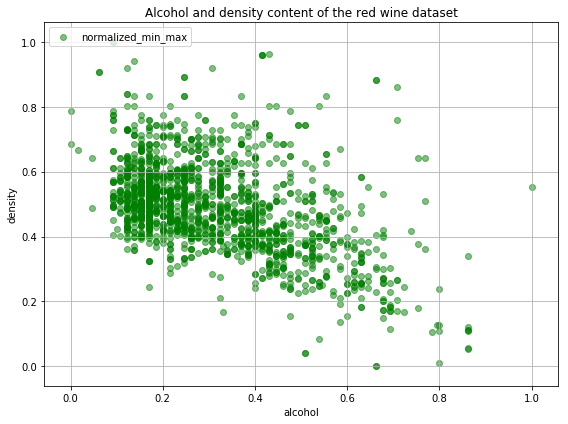

In [127]:
from matplotlib import pyplot as plt

## The min max normalized data plot

def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(red_wine_mmn['alcohol'], red_wine_mmn['density'],
            color='green', label='normalized_min_max', alpha=0.5)


    plt.title('Alcohol and density content of the red wine dataset')
    plt.xlabel('alcohol')
    plt.ylabel('density')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot()
plt.show()

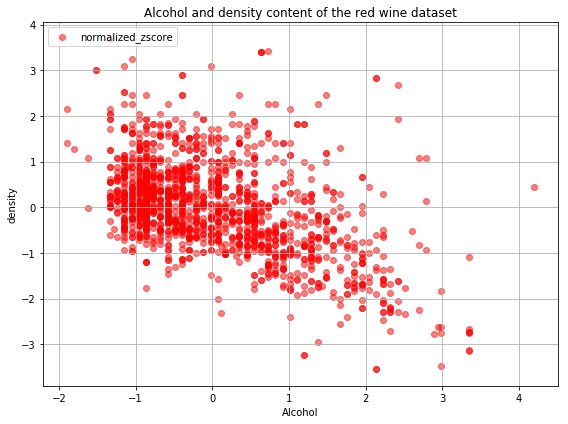

In [128]:
## The zscore normalized data plot

def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(red_wine_zs['alcohol'], red_wine_zs['density'],
            color='red', label='normalized_zscore', alpha=0.5)


    plt.title('Alcohol and density content of the red wine dataset')
    plt.xlabel('Alcohol')
    plt.ylabel('density')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot()
plt.show()

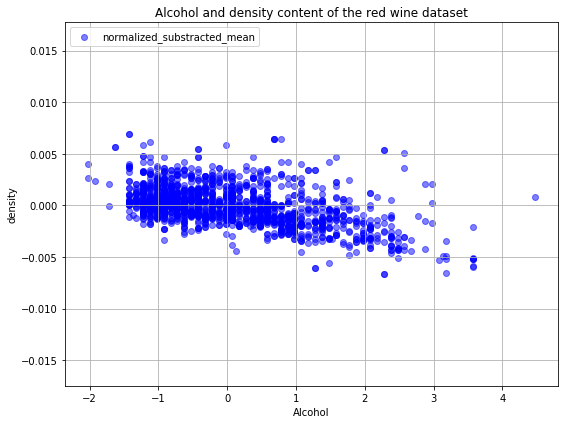

In [129]:
# The substracted mean normalized data plot:


def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(red_wine_sm['alcohol'], red_wine_sm['density'],
            color='blue', label='normalized_substracted_mean', alpha=0.5)


    plt.title('Alcohol and density content of the red wine dataset')
    plt.xlabel('Alcohol')
    plt.ylabel('density')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot()
plt.show()